# Palabras más comunes en las biografías de Julio César y de Augusto
### de Luis Bueno Archaga y Yago Tobio Souto

## 1 Webscraping con BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup

def scrape_wikipedia(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return ' '.join([p.text for p in soup.find_all('p')])

url_julio_cesar = "https://es.wikipedia.org/wiki/Julio_César"
url_augusto = "https://es.wikipedia.org/wiki/Augusto"

texto_julio_cesar = scrape_wikipedia(url_julio_cesar)
texto_augusto = scrape_wikipedia(url_augusto)

# Guardar los textos en archivos para su posterior análisis
with open('texto_julio_cesar.txt', 'w', encoding='utf-8') as file:
    file.write(texto_julio_cesar)

with open('texto_augusto.txt', 'w', encoding='utf-8') as file:
    file.write(texto_augusto)


## 2 Procesamiento de Texto con NLTK

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Descargar recursos de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Lista de palabras y caracteres a excluir
exclusiones = ['c', '«', '»', 'tras']

# Función para limpiar y tokenizar el texto
def procesar_texto(texto):
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(texto, language='spanish')
    palabras_importantes = [palabra for palabra in tokens if palabra not in stopwords.words('spanish') and palabra not in exclusiones]
    return palabras_importantes

# Leer y procesar los archivos de texto
with open('texto_julio_cesar.txt', 'r', encoding='utf-8') as file:
    texto_julio_cesar = file.read()

with open('texto_augusto.txt', 'r', encoding='utf-8') as file:
    texto_augusto = file.read()

palabras_julio_cesar = procesar_texto(texto_julio_cesar)
palabras_augusto = procesar_texto(texto_augusto)

# Contar las palabras más comunes
contador_julio_cesar = Counter(palabras_julio_cesar)
contador_augusto = Counter(palabras_augusto)

# Obtener las 10 palabras más comunes
mas_comunes_julio_cesar = contador_julio_cesar.most_common(10)
mas_comunes_augusto = contador_augusto.most_common(10)


c:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lbarc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lbarc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3 Visualización

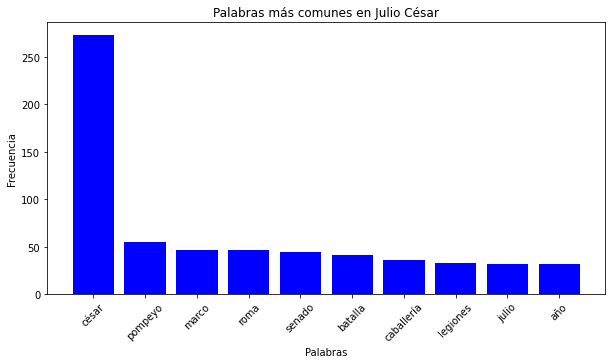

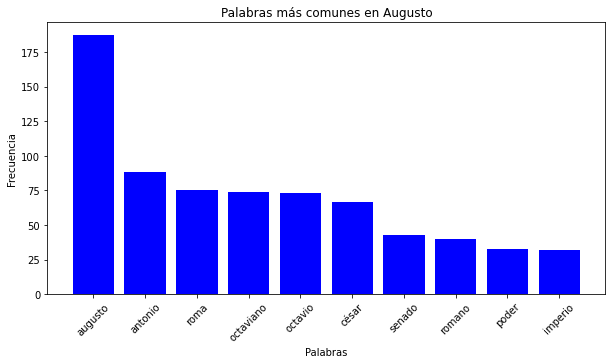

In [13]:
import matplotlib.pyplot as plt

def plot_common_words(common_words, title):
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Generar gráficos
plot_common_words(mas_comunes_julio_cesar, 'Palabras más comunes en Julio César')
plot_common_words(mas_comunes_augusto, 'Palabras más comunes en Augusto')


In [12]:
import plotly.graph_objects as go

def plot_interactive_comparison(counter_1, counter_2, title_1, title_2):
    # Obtener las 10 palabras más comunes de cada contador
    common_words_1 = [word[0] for word in counter_1.most_common(10)]
    common_words_2 = [word[0] for word in counter_2.most_common(10)]

    # Crear un conjunto unificado de palabras
    unique_words = set(common_words_1 + common_words_2)

    # Calcular la frecuencia total conjunta y ordenar
    total_counts = {word: counter_1[word] + counter_2[word] for word in unique_words}
    sorted_words = sorted(total_counts, key=total_counts.get, reverse=True)
    sorted_counts_1 = [counter_1[word] for word in sorted_words]
    sorted_counts_2 = [counter_2[word] for word in sorted_words]

    fig = go.Figure(data=[
        go.Bar(name=title_1, x=sorted_words, y=sorted_counts_1),
        go.Bar(name=title_2, x=sorted_words, y=sorted_counts_2)
    ])

    # Actualizar diseño
    fig.update_layout(
        barmode='group',
        title='Palabras más comunes en la biografía de Julio César y de Augusto',
        xaxis=dict(title='Palabras'),
        yaxis=dict(title='Frecuencia')
    )

    fig.show()


# Generar gráfico interactivo
plot_interactive_comparison(
    contador_julio_cesar, 
    contador_augusto, 
    'Julio César', 
    'Augusto'
)